In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
youtube_data = pd.read_csv("youtube_dataset.csv", index_col="video_id")

In [3]:
youtube_data.head()

,published_at,title,channel_id,channel_title,view_count,like_count,dislike_count,favorite_count,comment_count,duration,...,channel_description,channel_published_at,videoCount,tags,category_id,default_language,default_audio_language,license,content_rating,share_count
video_id,,,,,,,,,,,,,,,,,,,,,
4NISmeBNXy8,2024-03-16T09:30:01Z,আজ বাড়িতে সকালে রান্না খাওয়া হলো||বাড়িতে হঠ...,UCHxgoBn9vWA_gBaOI3phY6w,Sundarban Cooking,3253,460.0,NaN,0,30.0,00:23:55,...,"Hi Friends,\n Welcome to our channel 'S...",2021-07-01T06:23:14.495683Z,986,"['আজ বাড়িতে সকালের রান্না খাওয়া হলো', 'Sunda...",26,NaN,bn,youtube,{},NaN
PGHeFbpaH4Q,2024-03-15T18:30:15Z,Quick and Easy Za'atar and Labneh Spaghetti | ...,UC1rIOwTqDuWkFj87HZYRFOg,NYT Cooking,39986,2126.0,NaN,0,155.0,00:09:21,...,"All the food that’s fit to eat (yes, it’s an o...",2019-01-09T17:26:44Z,451,"['cooking', 'cooks', 'recipes', 'recipe', 'how...",26,NaN,en,youtube,{},NaN
fl2afHLEjyM,2024-03-15T17:37:01Z,Picking A Date Based On Our Cooking! (Mexican ...,UCDP7DZOgj8VTyhyVNup83QQ,Amp World,157804,4872.0,NaN,0,368.0,00:18:30,...,"Your Favorite Squad, All In One Place! \nWelco...",2020-07-31T04:23:34.048892Z,958,"['Amp World', 'Amp World News', 'Brent Rivera'...",24,NaN,zxx,youtube,{},NaN
6HgEZBxTsKQ,2024-03-15T17:03:52Z,"After Sehri To Iftar Very Busy Routine "" 1st J...",UCzR_69NUGuTW-AM_y8PCh5A,Cooking With Shabana,70457,2687.0,NaN,0,311.0,00:23:50,...,Assalam u Alaikum ♥️ Aap Sab Ka Welcome Mere C...,2017-08-18T19:32:16Z,1423,"['Shabana', 'Cooking with shabana', 'Iftar', '...",22,NaN,NaN,youtube,{},NaN
z3e2JfjHMP0,2024-03-15T17:00:48Z,Coolest Miniature: Watermelon Jelly Egg Ideas ...,UC5nA6O_7aYs3zWEX83m3jnw,Miniature Cooking,9778,120.0,NaN,0,16.0,00:08:06,...,❤️ Welcome to Miniature Cooking \n❤️ My channe...,2021-06-07T03:36:25.859685Z,602,"['watermelon jelly', 'watermelon', 'dessert', ...",24,NaN,en,youtube,{},NaN


### Step 1:
## Preprocessing

In [4]:
from datetime import timedelta

# Remove duplicates
youtube_data.drop_duplicates(inplace=True)

# The data in 'channel_published_at' is messy and we will use RE to sort it out
# Define regex pattern to extract date part
pattern = r'^(\d{4}-\d{2}-\d{2})'

# Extract date part using regex
youtube_data['channel_published_at'] = youtube_data['channel_published_at'].str.extract(pattern)

# Convert 'published_at' and 'channel_published_at' to datetime
youtube_data['published_at'] = pd.to_datetime(youtube_data['published_at'])
youtube_data['channel_published_at'] = pd.to_datetime(youtube_data['channel_published_at'])
youtube_data['channel_published_at'] = youtube_data['channel_published_at'].dt.tz_localize('UTC')



# Extract new features from text columns
youtube_data['number_of_words_in_title'] = youtube_data['title'].apply(lambda x: len(x.split()))
youtube_data['number_of_words_in_channel_description'] = youtube_data['channel_description'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
youtube_data['number_of_tags'] = youtube_data['tags'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Convert 'duration' to seconds
def duration_to_seconds(duration):
    try:
        time_parts = duration.split(':')
        return int(time_parts[0]) * 3600 + int(time_parts[1]) * 60 + int(time_parts[2])
    except:
        return None

youtube_data['duration_seconds'] = youtube_data['duration'].apply(duration_to_seconds)

# Calculate the number of days since the first video in the dataset was published
youtube_data['days_since_published'] = (youtube_data['published_at'] - youtube_data['published_at'].min()).dt.days
# Calculate the number of days since the first video in the channel was published
youtube_data['days_since_channel_published'] = (youtube_data['published_at'] - youtube_data['channel_published_at']).dt.days

# Remove unnecessary columns
columns_to_drop = ['duration', 'favorite_count', 'dislike_count', 'channel_title', 'default_language', 
                   'default_audio_language', 'license', 'content_rating', 'share_count', 'channel_description']
youtube_data.drop(columns_to_drop, axis=1, inplace=True)

# Check for missing values
youtube_data.isnull().sum()

published_at                               0
title                                      0
channel_id                                 0
view_count                                 0
like_count                                40
comment_count                             43
definition                                 0
topic                                      0
subscriber_count                           0
total_channel_views                        0
channel_published_at                       0
videoCount                                 0
tags                                       0
category_id                                0
number_of_words_in_title                   0
number_of_words_in_channel_description     0
number_of_tags                             0
duration_seconds                           0
days_since_published                       0
days_since_channel_published               0
dtype: int64

In [5]:
# Fill in missing values with 0 - videos without likes/comments have no relevant key
youtube_data['like_count'] = youtube_data['like_count'].fillna(0)
youtube_data['comment_count'] = youtube_data['comment_count'].fillna(0)

In [6]:
# Calculate the ratio of likes per view and comments per view
youtube_data['likes_per_view'] = youtube_data['like_count'] / youtube_data['view_count']
youtube_data['comments_per_view'] = youtube_data['comment_count'] / youtube_data['view_count']

### Step 2:
## Visuzaling

First we'll want to visualize the data.

Since our data have more then 3 dimetions, We need to use other methods for visualize it.

We will define pipeline for handling both the categorical and numerical columns

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Define the categorical columns and numerical columns as you have listed
categorical_columns = ['category_id', 'topic', 'definition']

numerical_columns = ['view_count', 'like_count', 'comment_count', 'subscriber_count', 
                     'total_channel_views', 'videoCount', 'number_of_words_in_title',
                     'number_of_words_in_channel_description', 'number_of_tags', 
                     'duration_seconds', 'days_since_published', 'days_since_channel_published']

# Create pipelines for both numerical and categorical preprocessing
# For numerical features: impute missing values and apply MinMaxScaler
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Fill missing values with 0
    ('scaler', MinMaxScaler())
])

# For categorical features: impute missing values and apply OneHotEncoder
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Fill missing values with 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)

X = preprocessor.fit_transform(youtube_data)

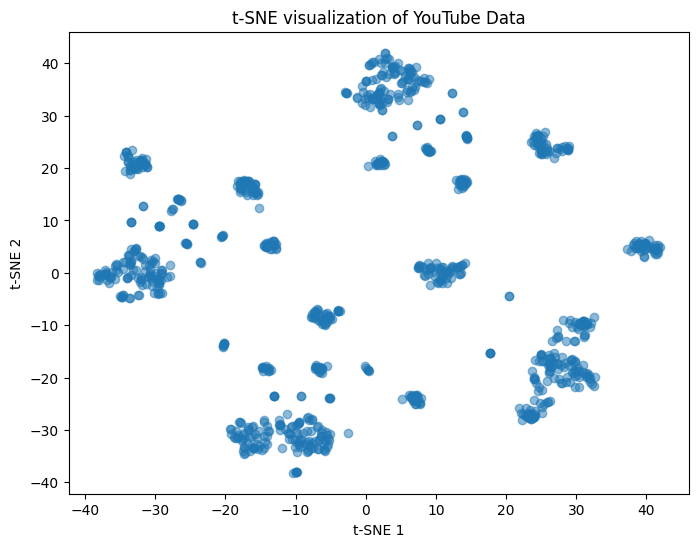

In [8]:
from sklearn.manifold import TSNE

# Applying t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(X)

# Plotting the results of t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
plt.title('t-SNE visualization of YouTube Data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

By looking at the plot we can see there are a few seperate clusters, and a few outliers that seems outside the clusters.

t-SNE is stochastic algorithm and based on t-distribution, for better understanding we'll also apply PCA on the data

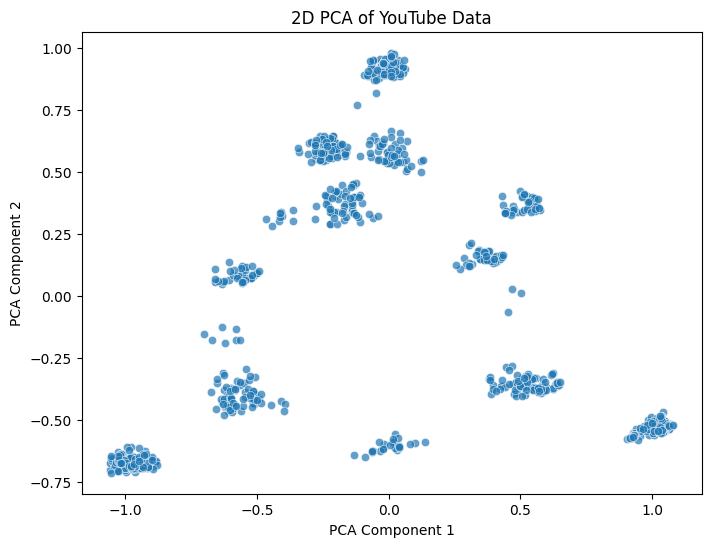

Total Variance captured from the data: 38.10%


In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA on the transformed data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the first two PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA of YouTube Data')
plt.show()

# Print the percentage variance captured in PCA
print(f'Total Variance captured from the data: {np.sum(pca.explained_variance_ratio_) * 100:.2f}%')

We can see a few clusters with high density within them, and a few outliers that seems not belonging to any cluster.

But, with only 2 principal components, we are able to capture only 38.1% of the variance from the original data. Let's check how much adding another dimention will help

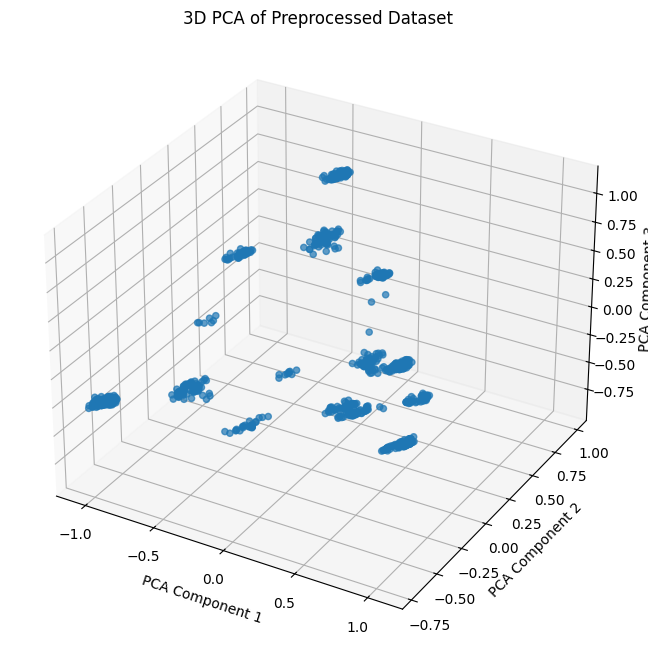

Total Variance captured from the data: 54.78%


In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Now apply PCA on the transformed data for 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Plot the first three PCA components in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the first three PCA components
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.7)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D PCA of Preprocessed Dataset')
plt.show()

# Print the percentage variance captured in PCA
print(f'Total Variance captured from the data: {np.sum(pca.explained_variance_ratio_) * 100:.2f}%')

By adding another principal component, we got better results and able to capture 54.78% of the data.

Because 3D is the maximun number of dimensions we can visualize, we will stay with that. And even with 54.78% of the variance we can understand alot about the data.

### Step 2:
## Clustering

#### KMeans

From the plots, we can see that the clusters have a spherical shape and are well-separated, so KMeans could be a good fir for out situation

To determine the best K parameter, we will plot the inertia for every K and search for the elbow. we will also plot the scaled inertia.

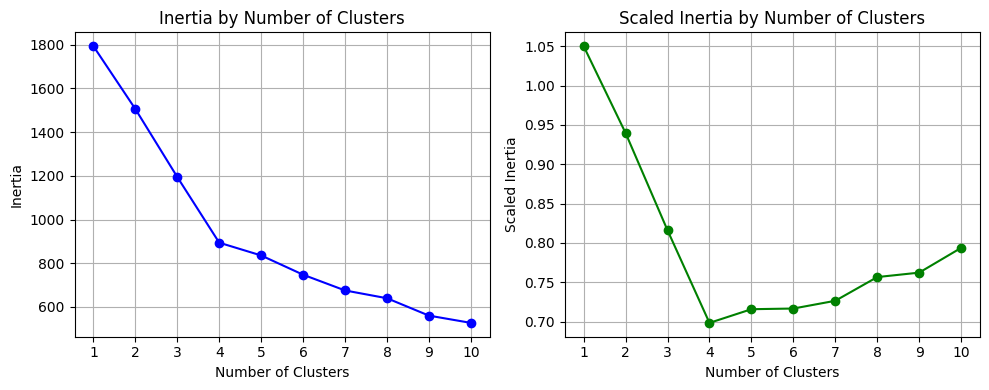

In [11]:
from sklearn.cluster import KMeans

alpha_k = 0.05  # Parameter for scaled inertia
inertia_values = []
scaled_inertia_values = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
    
    # Calculating scaled inertia
    inertia_o = np.square(X - X.mean(axis=0)).sum()
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    scaled_inertia_values.append(scaled_inertia)

# Plot the Elbow Curve for both original inertia and scaled inertia values side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot for original inertia
axes[0].plot(range(1, 11), inertia_values, marker='o', color='blue')
axes[0].set_title('Inertia by Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].set_xticks(range(1, 11))
axes[0].grid(True)

# Plot for scaled inertia
axes[1].plot(range(1, 11), scaled_inertia_values, marker='o', color='green')
axes[1].set_title('Scaled Inertia by Number of Clusters')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Scaled Inertia')
axes[1].set_xticks(range(1, 11))
axes[1].grid(True)

plt.tight_layout()
plt.show()

According to the "elbow" method, the right number of clusters is 4.

The problem is the elbow method only reffers to the within-cluster sum of squares. However, it doesn't account for the second aspect, which is the separation between clusters.

That's why we will also use the silhouette

For n_clusters = 2, the average silhouette_score is: 0.36376943564336134
For n_clusters = 3, the average silhouette_score is: 0.5073613019411771
For n_clusters = 4, the average silhouette_score is: 0.705276319636305
For n_clusters = 5, the average silhouette_score is: 0.6840198947683319
For n_clusters = 6, the average silhouette_score is: 0.6850573942219459
For n_clusters = 7, the average silhouette_score is: 0.6687868122870346
For n_clusters = 8, the average silhouette_score is: 0.6641541294629987
For n_clusters = 9, the average silhouette_score is: 0.7010191476560595
For n_clusters = 10, the average silhouette_score is: 0.7499096435220989
For n_clusters = 11, the average silhouette_score is: 0.7830647073036705
For n_clusters = 12, the average silhouette_score is: 0.8194489498490668
For n_clusters = 13, the average silhouette_score is: 0.8288940049692085
For n_clusters = 14, the average silhouette_score is: 0.8373880470683636
For n_clusters = 15, the average silhouette_score is: 0.809

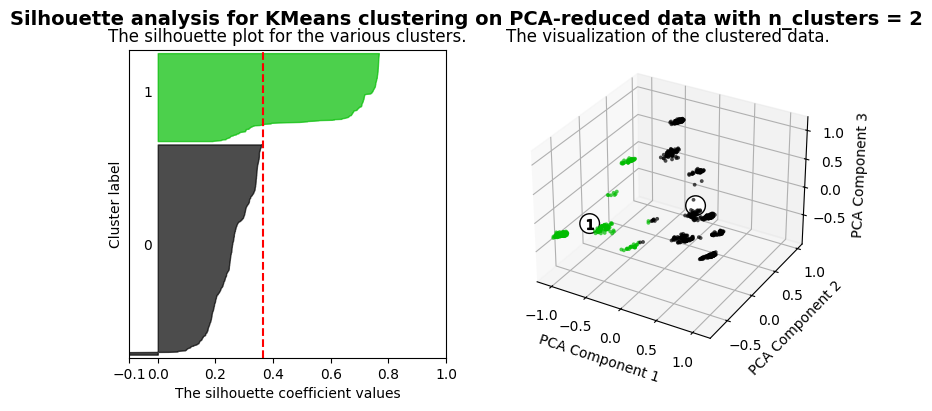

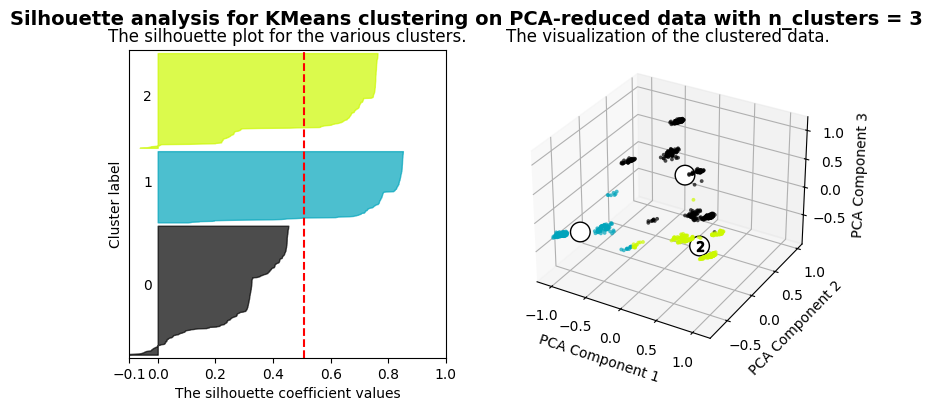

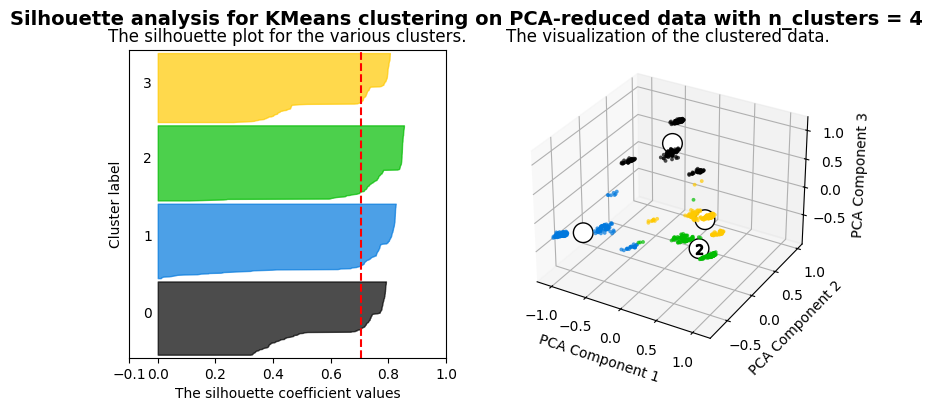

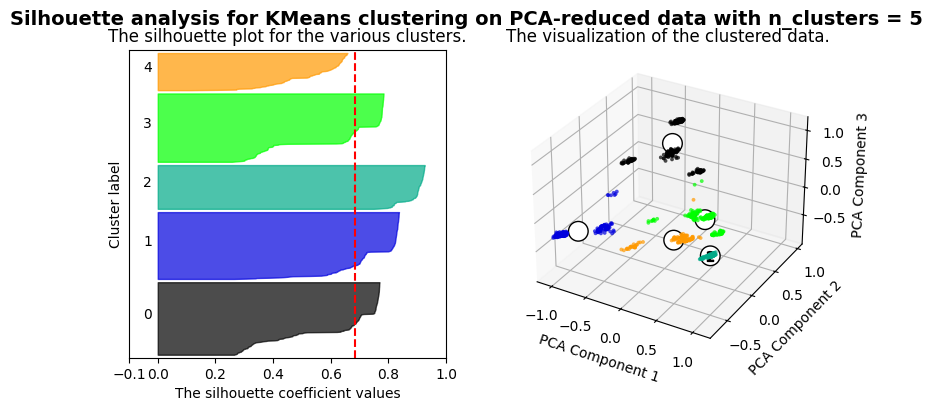

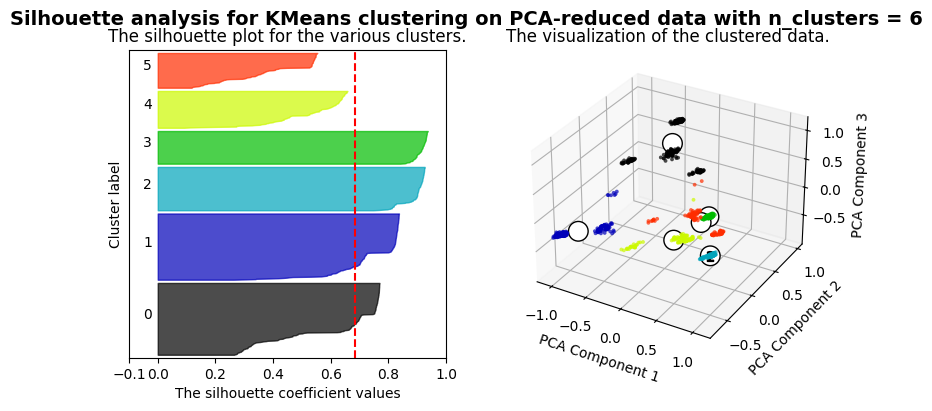

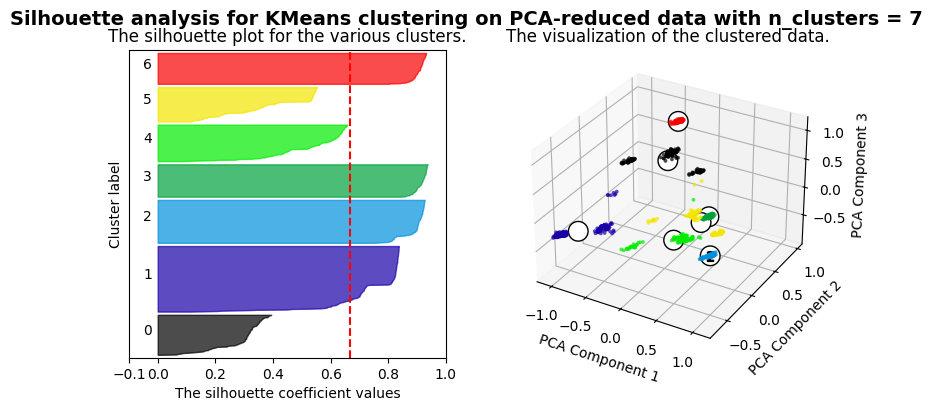

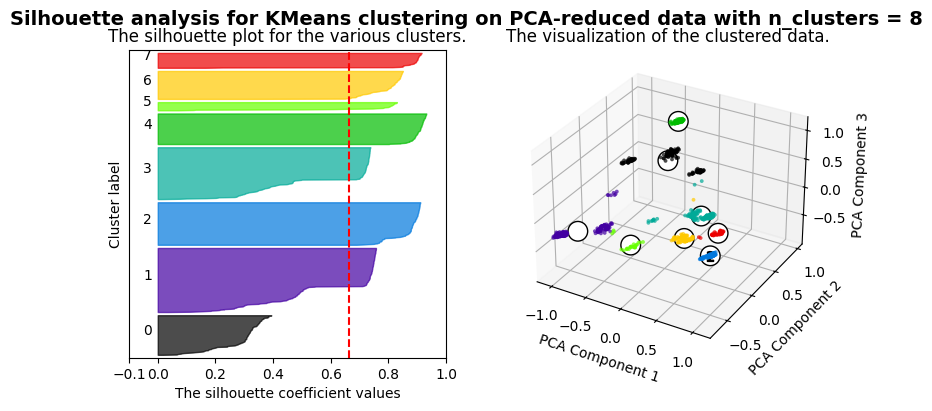

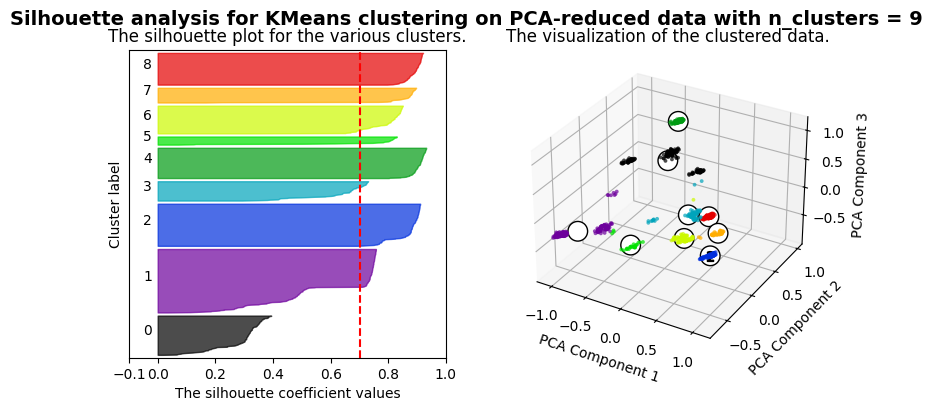

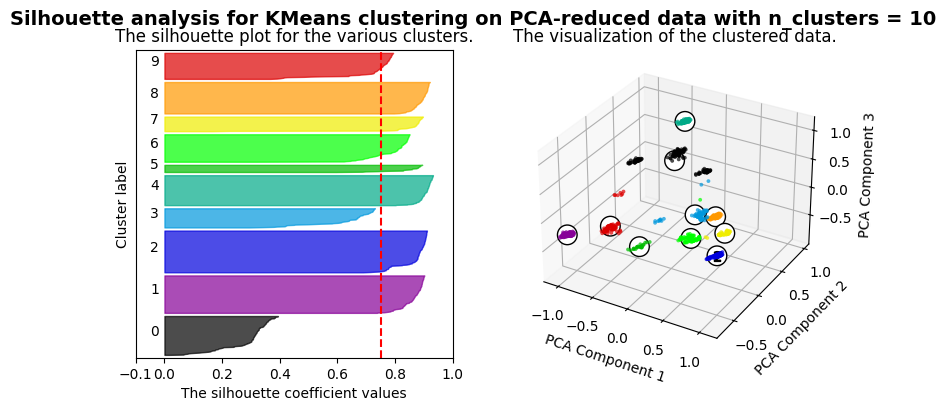

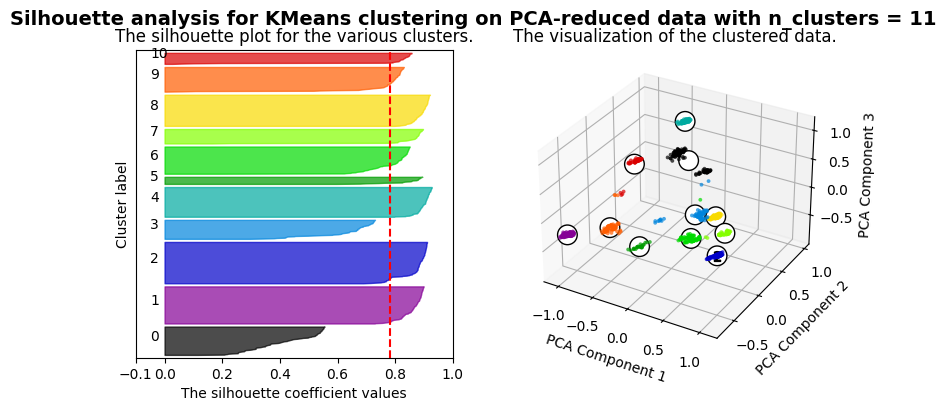

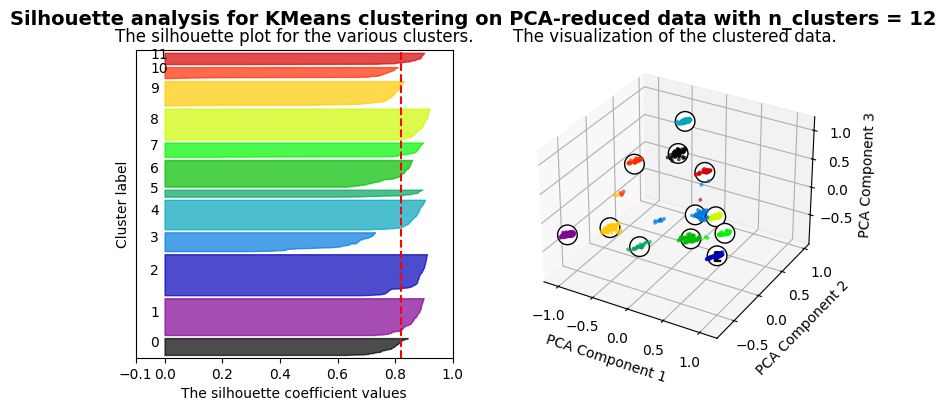

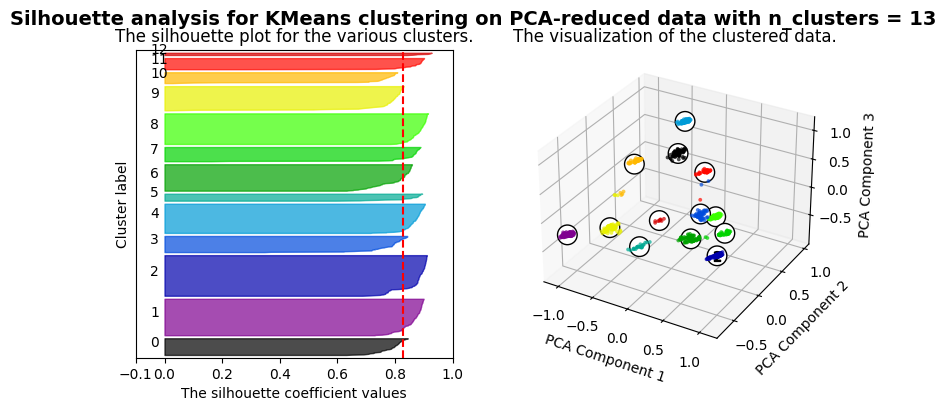

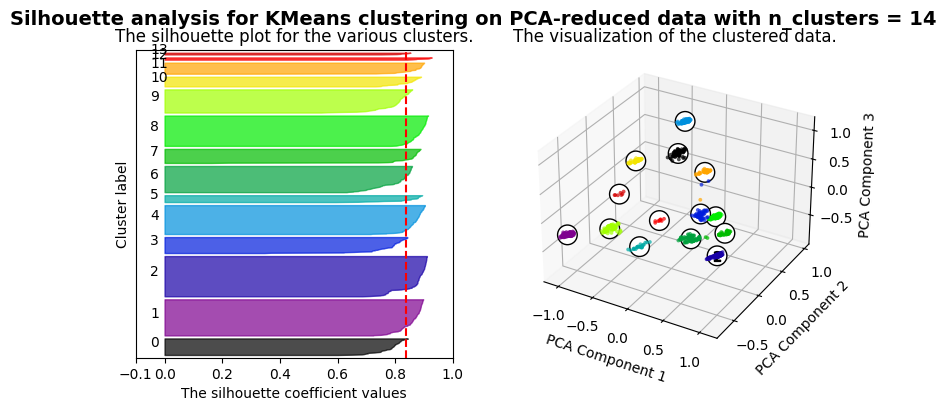

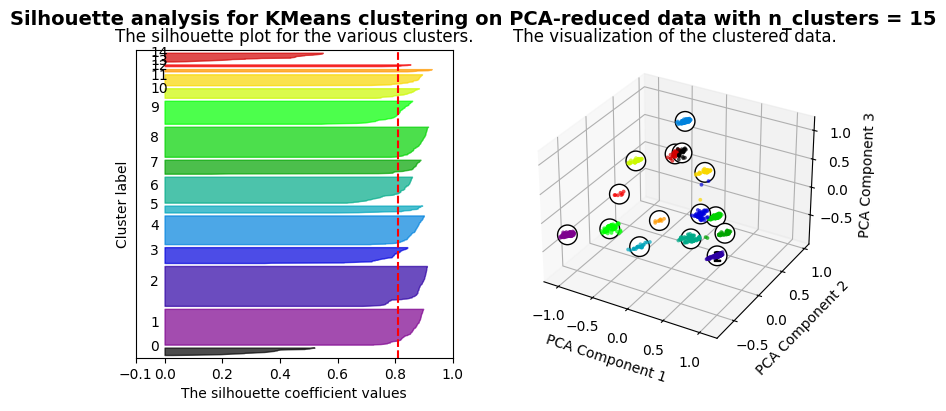

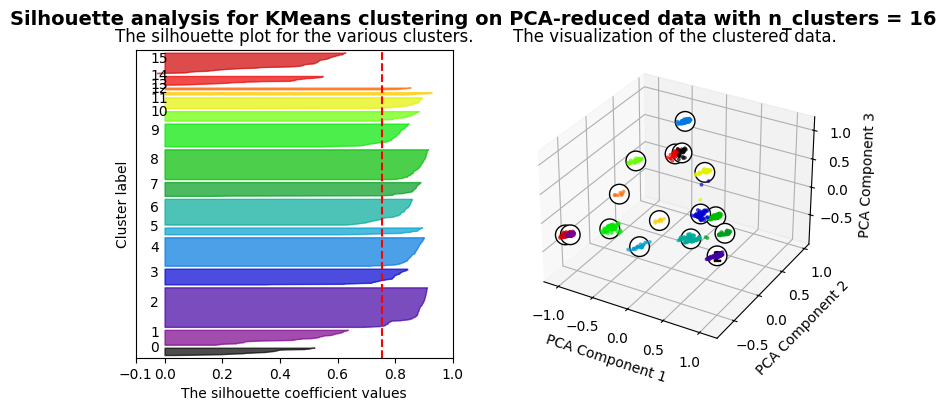

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

range_n_clusters = list(range(2, 17))  

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig = plt.figure(figsize=(9, 4))

    # The 1st subplot is the silhouette plot
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])

    # Initialize kmeans with n_clusters value and a random generator seed for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X_pca)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], centers[:, 2],
                marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], c[2], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PCA Component 1")
    ax2.set_ylabel("PCA Component 2")
    ax2.set_zlabel("PCA Component 3")

    plt.suptitle(f"Silhouette analysis for KMeans clustering on PCA-reduced data with n_clusters = {n_clusters}", fontsize=14, fontweight='bold')

plt.show()


By plotting the silhouette score and the data we can see that with K = 14, the average silhouette_score is: 0.837, and it looks like the best separation between clusters


#### DBSCAN

Another algorithm for clustering is DBSCAN. It's based on density of a group of points.